In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import KFold
import seaborn as sns

In [27]:
healthcare_df = pd.read_csv("insurance.csv")
display(healthcare_df.describe())

if healthcare_df.isna().any().any() == True:
    print("There is a NaN value.")
else:
    print("There are no NaN values.")

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


There are no NaN values.


In [28]:
national_avg = healthcare_df['charges'].mean()
national_avg

13270.422265141257

In [29]:
healthcare_df.loc[healthcare_df["children"] == 0].describe()

,age,bmi,children,charges
count,574.000000,574.000000,574.0,574.000000
mean,38.444251,30.550296,0.0,12365.975602
std,16.436228,6.039106,0.0,12023.293942
min,18.000000,15.960000,0.0,1121.873900
25%,22.000000,26.143750,0.0,2734.421150
50%,36.000000,30.302500,0.0,9856.951900
75%,55.000000,34.746250,0.0,14440.123825
max,64.000000,53.130000,0.0,63770.428010


In [30]:
healthcare_df.loc[(healthcare_df["charges"] > national_avg) & (healthcare_df["children"] > 0)]

,age,sex,bmi,children,smoker,region,charges
23,34,female,31.920,1,yes,northeast,37701.87680
25,59,female,27.720,3,no,southeast,14001.13380
29,31,male,36.300,2,yes,southwest,38711.00000
34,28,male,36.400,1,yes,southwest,51194.55914
36,62,female,32.965,3,no,northwest,15612.19335
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1318,35,male,39.710,4,no,northeast,19496.71917
1323,42,female,40.370,2,yes,southeast,43896.37630


In [31]:
healthcare_df = pd.get_dummies(healthcare_df, columns = ["sex"], dtype = int, drop_first = True)
healthcare_df = pd.get_dummies(healthcare_df, columns = ["smoker"], dtype = int, drop_first = True)
healthcare_df = healthcare_df.drop(columns = "region")

,age,bmi,children,charges,sex_male,smoker_yes
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.505232,0.204783
std,14.049960,6.098187,1.205493,12110.011237,0.500160,0.403694
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,1.000000,0.000000
75%,51.000000,34.693750,2.000000,16639.912515,1.000000,0.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000


<Axes: >

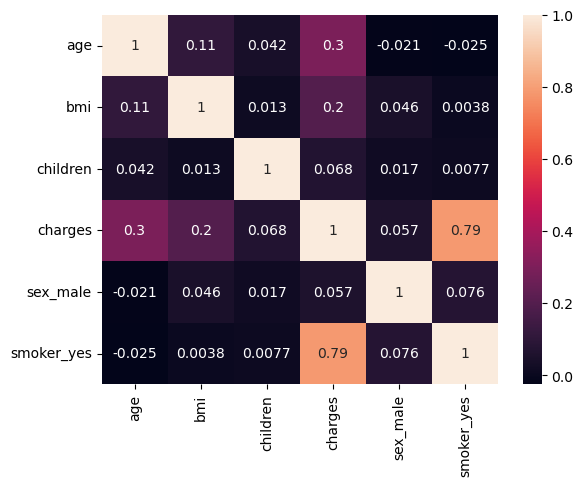

In [32]:
display(healthcare_df.describe())
sns.heatmap(healthcare_df.corr(), annot = True)

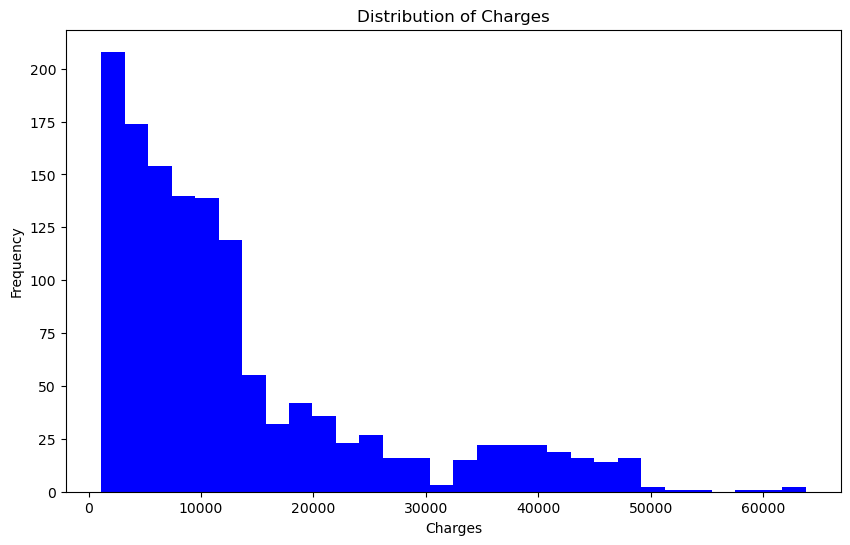

In [33]:
plt.figure(figsize=(10, 6))
plt.hist(healthcare_df["charges"], bins = 'auto', color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

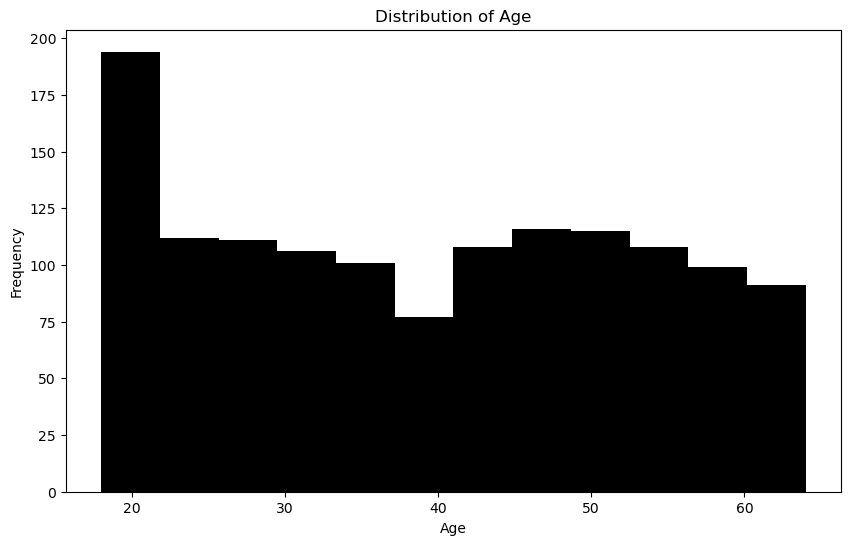

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(healthcare_df["age"], bins = 'auto', color='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

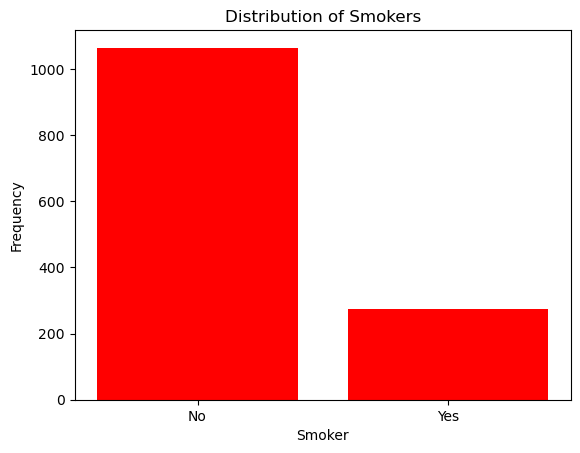

In [35]:
plt.figure()
plt.bar([0, 1], healthcare_df["smoker_yes"].value_counts(), color='red')
plt.title('Distribution of Smokers')
plt.xlabel('Smoker')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])  
plt.show()

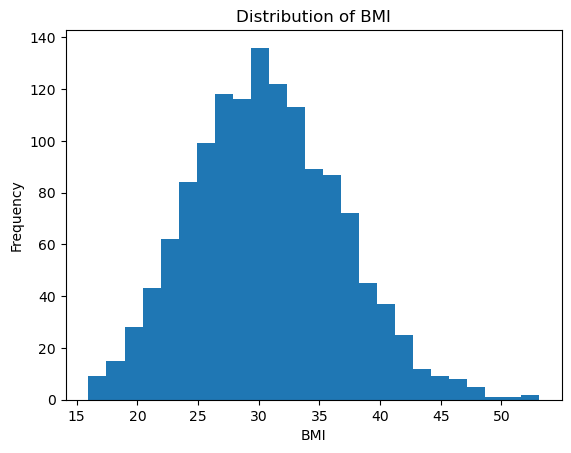

In [36]:
plt.figure()
plt.hist(healthcare_df["bmi"], bins = "auto")
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

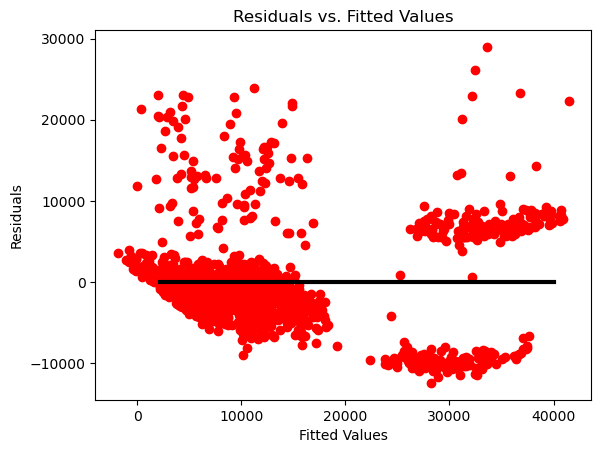

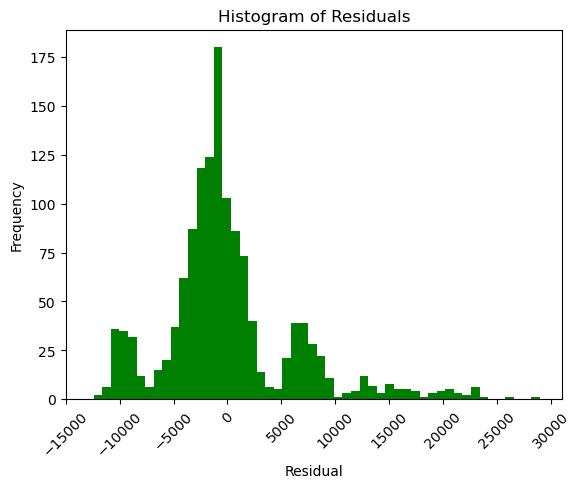

In [37]:
X = healthcare_df[["age", "bmi", "smoker_yes"]]
y = healthcare_df["charges"]

model = LinearRegression().fit(X, y)

fitted_values = model.predict(X)  
residuals = y - fitted_values

plt.scatter(x = fitted_values, y = residuals, c = "red")
plt.plot([2200, 40000], [0,0], color = "black", lw = 3);
plt.title("Residuals vs. Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

plt.figure()
plt.hist(residuals, color="green", bins="auto")
plt.title("Histogram of Residuals")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.xticks(np.arange(-15000, 31000, 5000), rotation = 45)  
plt.show()

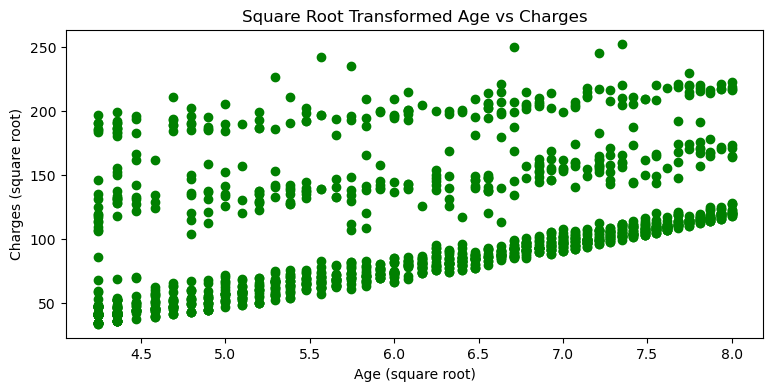

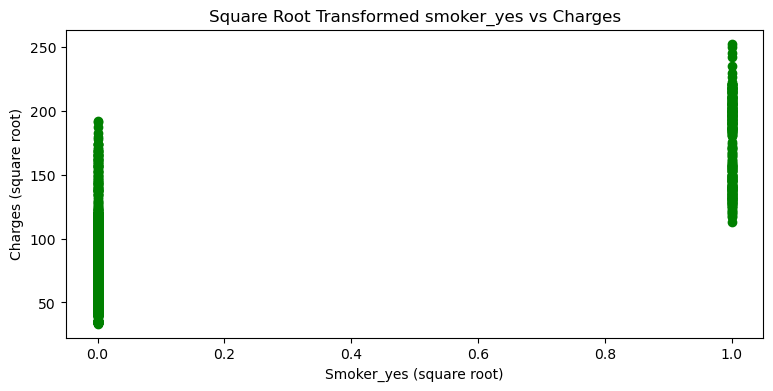

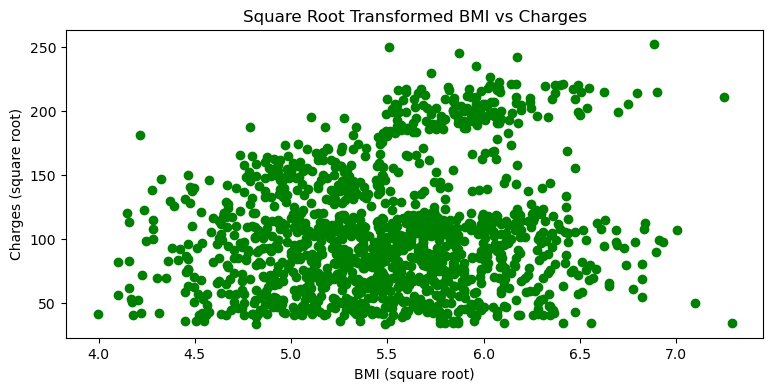

In [38]:
plt.figure(figsize=(9, 4))
plt.scatter(np.sqrt(healthcare_df["age"]), np.sqrt(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (square root)")
plt.xlabel("Age (square root)")
plt.title("Square Root Transformed Age vs Charges")
plt.show()

plt.figure(figsize=(9, 4))
plt.scatter(np.sqrt(healthcare_df["smoker_yes"]), np.sqrt(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (square root)")
plt.xlabel("Smoker_yes (square root)")
plt.title("Square Root Transformed smoker_yes vs Charges")
plt.show()

plt.figure(figsize=(9, 4))
plt.scatter(np.sqrt(healthcare_df["bmi"]), np.sqrt(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (square root)")
plt.xlabel("BMI (square root)")
plt.title("Square Root Transformed BMI vs Charges")
plt.show()



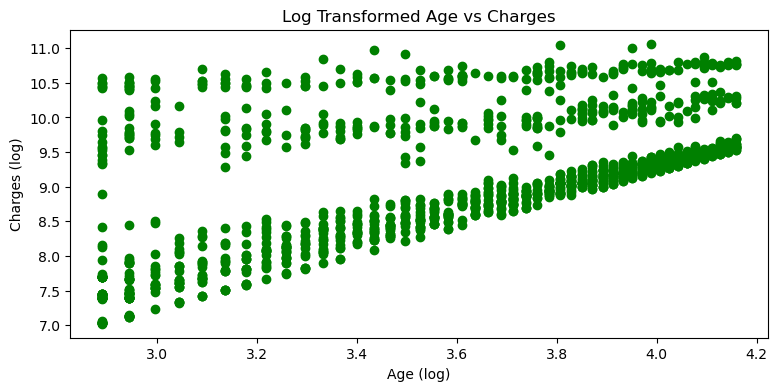

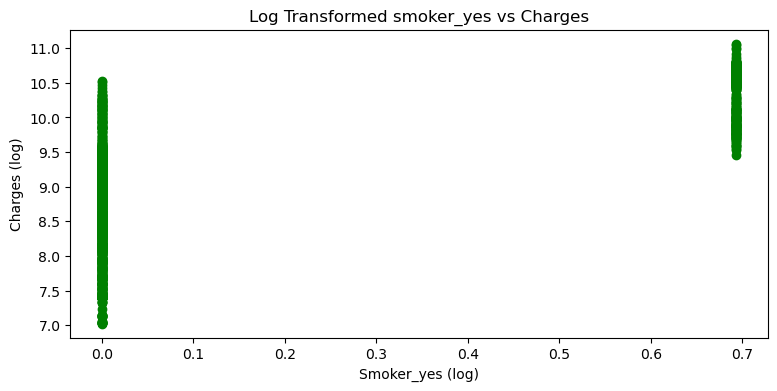

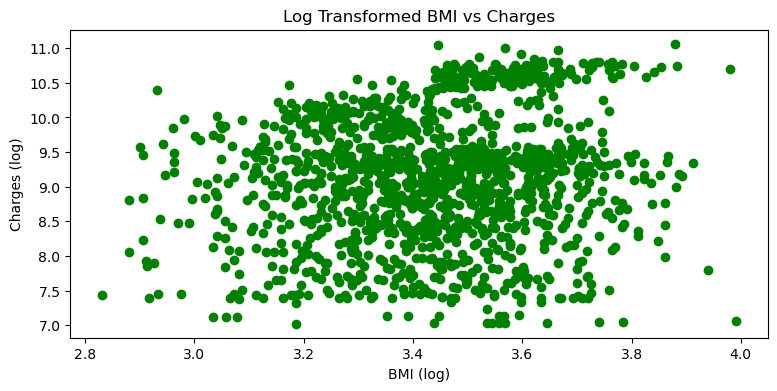

In [39]:
plt.figure(figsize=(9, 4))
plt.scatter(np.log(healthcare_df["age"]), np.log(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (log)")
plt.xlabel("Age (log)")
plt.title("Log Transformed Age vs Charges")
plt.show()

plt.figure(figsize=(9, 4))
# Added one to the smoker_yes predictor so I can use log on it
plt.scatter(np.log(healthcare_df["smoker_yes"] + 1), np.log(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (log)")
plt.xlabel("Smoker_yes (log)")
plt.title("Log Transformed smoker_yes vs Charges")
plt.show()

plt.figure(figsize=(9, 4))
plt.scatter(np.log(healthcare_df["bmi"] + 1), np.log(healthcare_df["charges"]), c="green")
plt.ylabel("Charges (log)")
plt.xlabel("BMI (log)")
plt.title("Log Transformed BMI vs Charges")
plt.show()



Text(0, 0.5, 'charges')

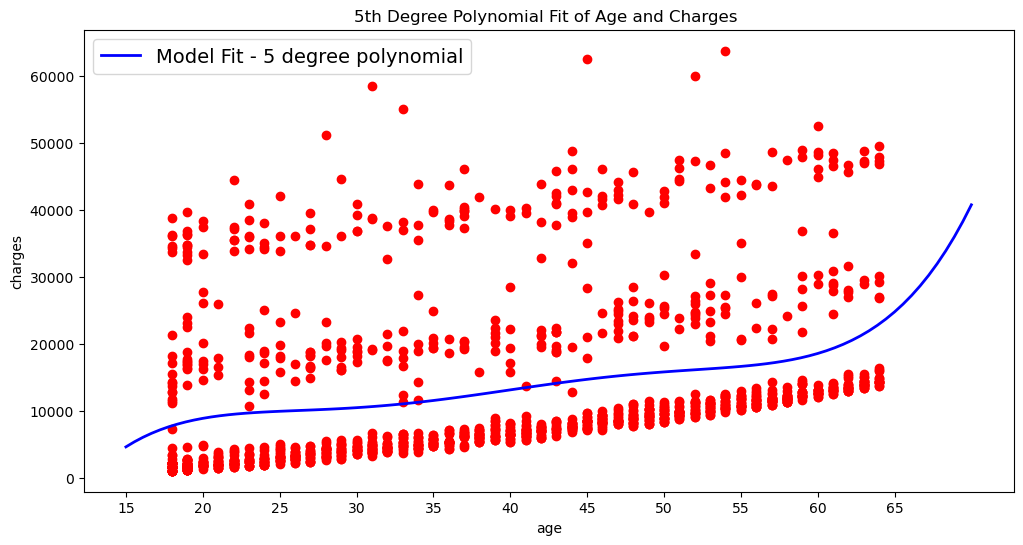

In [40]:
poly = PolynomialFeatures(degree = 5, include_bias=False)
x_poly = poly.fit_transform(healthcare_df[["age"]])

lin_reg = LinearRegression()
lin_reg.fit(x_poly, healthcare_df["charges"])
x_new = np.linspace(15, 70, 100).reshape(100, 1)
y_new = lin_reg.predict(poly.fit_transform(x_new))

plt.figure(figsize=(12, 6))  
plt.scatter(healthcare_df["age"], healthcare_df["charges"], color="red")
plt.plot(x_new, y_new, "b-", linewidth=2, label="Model Fit - 5 degree polynomial")
plt.legend(loc="upper left", fontsize=14)
plt.title("5th Degree Polynomial Fit of Age and Charges ")
plt.xlabel("age")
plt.xticks(np.arange(15, 66, 5))
plt.ylabel("charges")

In [41]:
X = healthcare_df[["age", "bmi", "smoker_yes"]]
y = healthcare_df["charges"]

#Raw, unchanged data
model = LinearRegression().fit(X, y)

fitted_values = model.predict(X)
r2_1 = r2_score(y, fitted_values)

#Square root transformed data
model2 = model.fit(np.sqrt(X), np.sqrt(y))

fitted_values2 = model2.predict(np.sqrt(X))
r2_2 = r2_score(np.sqrt(y), fitted_values2)

#Log transformed data
log_X = X.copy()
log_X["age"] = np.log(X["age"])
log_X["bmi"] = np.log(X["bmi"])
log_X["smoker_yes"] = np.log(X["smoker_yes"] + 1)

model3 = model.fit(log_X[["age", "bmi", "smoker_yes"]], np.log(y))

fitted_values3 = model3.predict(log_X[["age", "bmi", "smoker_yes"]])
r2_3 = r2_score(np.log(y), fitted_values3)

#Polynomial fit on age as a predictor 
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(X)
model4 = LinearRegression().fit(x_poly, y)
fitted_values4 = model4.predict(x_poly)
r2_4 = r2_score(y, fitted_values4)

print(f"Raw: {r2_1}, Sqrt: {r2_2}, Log: {r2_3}, Polynomial deg 5: {r2_4}")


Raw: 0.7474771588119513, Sqrt: 0.769525992524883, Log: 0.7517447248917407, Polynomial deg 5: 0.6522606095516591


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=123) 

In [43]:
def mean_squared_error(x, y):
    '''Returns the MSE of x and y'''
    return np.mean((x-y)**2)

In [44]:
log_X_train = np.log(X_train[["age", "bmi"]]).merge(np.log(X_train[["smoker_yes"]] + 1), left_index=True, right_index=True)

poly_train = PolynomialFeatures(degree = 5)
X_train_poly = poly.fit_transform(X_train)
model3 = LinearRegression().fit(X_train_poly, y_train)
fitted_values_train = model3.predict(X_train_poly)

combi_1 = [X_train, y_train]
combi_2 = [np.sqrt(X_train), np.sqrt(y_train)]
combi_3 = [log_X_train, np.log(y_train)]
combi_4 = [pd.DataFrame(X_train_poly), y_train]

predictor_combinations = [combi_1, combi_2, combi_3, combi_4]

mse = []
r_squared =[]
for predictor in predictor_combinations:
    k_fold = KFold(n_splits = 10, shuffle = True, random_state = 143)

    mse_fold = []
    r_squared_fold = []
    
    for train_index, val_index in k_fold.split(predictor[0], predictor[1]):
        X_train_, y_train_ = predictor[0].iloc[train_index], predictor[1].iloc[train_index]
        X_val_, y_val_ = predictor[0].iloc[val_index], predictor[1].iloc[val_index]
    
        scaler = StandardScaler()
        Xs_train = scaler.fit_transform(X_train_)
        Xs_val = scaler.transform(X_val_)
    
        my_model = LinearRegression()
        my_model.fit(Xs_train, y_train_)
    
        fitted_values = my_model.predict(Xs_val)
    
        mse_fold.append(mean_squared_error(y_val_, fitted_values)) 
        r_squared_fold.append(r2_score(y_val_, fitted_values))
    
    mse.append(np.mean(mse_fold)) 
    r_squared.append(np.mean(r_squared_fold))


for i, (mse_val, r_squared_val) in enumerate(zip(mse, r_squared), 1):
    print(f"MSE for Combination {i}: {mse_val}")
    print(f"R2 Score for Combination {i}: {r_squared_val}")

MSE for Combination 1: 39003878.83040061
R2 Score for Combination 1: 0.7228987714973811
MSE for Combination 2: 560.5608212906301
R2 Score for Combination 2: 0.7499002061834827
MSE for Combination 3: 0.22321980455628773
R2 Score for Combination 3: 0.7375306750155797
MSE for Combination 4: 33583043.84341029
R2 Score for Combination 4: 0.7481906062297936


In [45]:
scalerX = StandardScaler().fit(np.sqrt(X_train))
X_train_scaled = scalerX.transform(np.sqrt(X_train))
X_test_scaled = scalerX.transform(np.sqrt(X_test))

y_train_array = np.array(np.sqrt(y_train)).reshape(-1, 1)
scalerY = StandardScaler().fit(y_train_array)
Y_train_scaled = scalerY.transform(y_train_array)

y_test_array = np.array(np.sqrt(y_test)).reshape(-1, 1)
Y_test_scaled = scalerY.transform(y_test_array)


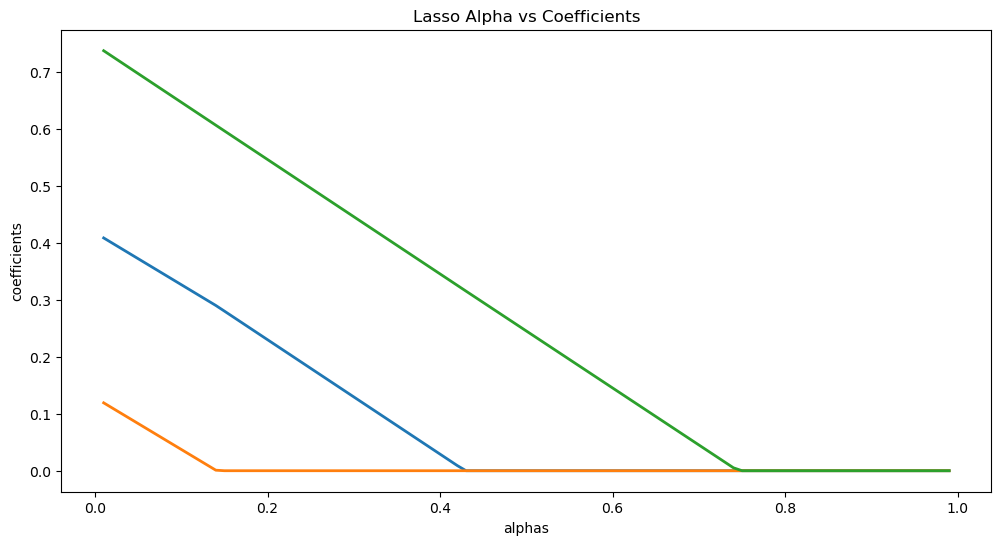

In [46]:
# code here and in additional cells if needed
coefs = []
alphas = np.arange(0.01, 1, 0.01)

for a in alphas:
    model = Lasso(alpha=a)
    model.fit(X_train_scaled, Y_train_scaled)
    coefs.append(model.coef_)
    
plt.figure(figsize=(12, 6))  
plt.plot(alphas, coefs, linewidth=2);
plt.xlabel('alphas')
plt.ylabel('coefficients')
plt.title('Lasso Alpha vs Coefficients')
plt.show()

In [49]:
# Assume X_train_scaled, Y_train_scaled, X_test_scaled, and y_test are pre-defined

# Lasso fit with Cross-Validation
lasso_best = LassoCV(cv=10, max_iter=100000)
lasso_best.fit(X_train_scaled, Y_train_scaled.ravel())  # Ensuring Y is a 1D array
lasso_fit = lasso_best.predict(X_test_scaled)

# Prepare the data for sqrt transformation 10-fold CV
X_test_sqrt = np.sqrt(X_test)
y_test_log = np.log(y_test)

ten_fold = KFold(n_splits=10, shuffle=True, random_state=21)
coefs = []
r2_scores = []
mse_scores = []

# Perform the cross-validation
for train_index, val_index in ten_fold.split(X_test_sqrt):
    X_train_, X_val_ = X_test_sqrt.iloc[train_index], X_test_sqrt.iloc[val_index]
    y_train_, y_val_ = y_test_log.iloc[train_index], y_test_log.iloc[val_index]

    # Standardize features within the loop
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_)
    X_val_scaled = scaler.transform(X_val_)

    # Train the model
    my_model = LinearRegression()
    my_model.fit(X_train_scaled, y_train_)
    coefs.append(my_model.coef_)
    fitted_values = my_model.predict(X_val_scaled)

    # Calculate scores for each fold
    r2_scores.append(r2_score(y_val_, fitted_values))
    mse_scores.append(mean_squared_error(y_val_, fitted_values))

# Calculate average R2 and MSE from the folds
avg_r2 = np.mean(r2_scores)
avg_mse = np.mean(mse_scores)

# Print the results
print("Average R2 score of sqrt transformation fit:", avg_r2)
print("Average MSE of sqrt transformation fit:", avg_mse)
print("R2 score of best lasso fit:", r2_score(y_test, lasso_fit))  # Ensure y_test is used, not transformed
print("MSE of best lasso fit:", mean_squared_error(y_test, lasso_fit))

Average R2 score of sqrt transformation fit: 0.7802410874114176
Average MSE of sqrt transformation fit: 0.16246554433949578
R2 score of best lasso fit: -1.2085985523534264
MSE of best lasso fit: 337684888.92391104


In [47]:
#Lasso fit CV
lasso_best = LassoCV(cv = 10, max_iter = 100000)
lasso_best.fit(X_train_scaled, Y_train_scaled)

lasso_fit = lasso_best.predict(X_test_scaled)

#Sqrt transformation 10-fold CV
ten_fold = KFold(n_splits = 10, shuffle = True, random_state = 21)
coefs = []
for train_index, val_index in ten_fold.split(np.sqrt(X_test), np.log(y_test)):
    X_train_, y_train_ = np.sqrt(X_test).iloc[train_index], np.log(y_test).iloc[train_index]
    X_val_, y_val_ = np.sqrt(X_test).iloc[val_index], np.log(y_test).iloc[val_index]
    
    scaler = StandardScaler()
    Xs_train = scaler.fit_transform(X_train_)
    Xs_val = scaler.transform(X_val_)
    
    my_model = LinearRegression()
    my_model.fit(Xs_train, y_train_)
    coefs.append(my_model.coef_)
    fitted_values = my_model.predict(Xs_val)
        
print("R2 score of sqrt transformation fit:", r2_score(y_val_, fitted_values))
print("R2 score of best lasso fit:", r2_score(Y_test_scaled, lasso_fit))
print("MSE of sqrt transformation fit:", mean_squared_error(y_val_, fitted_values))
print("MSE of best lasso fit:", mean_squared_error(Y_test_scaled, lasso_fit))

R2 score of sqrt transformation fit: 0.9177483566189206
R2 score of best lasso fit: 0.8188417651782685
MSE of sqrt transformation fit: 0.06846545565776002
MSE of best lasso fit: 1.7346908730881334


/Users/graceli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
#sqrt model coefficients
print("SQRT model coefs:", LinearRegression().fit(np.sqrt(X_train), np.sqrt(y_train)).coef_)
#lasso model coefficients
print("Lasso Regularised Sqrt model coefs:", lasso_best.fit(X_train_scaled, Y_train_scaled).coef_)
print("Best Lasso Alpha:", lasso_best.fit(X_train_scaled, Y_train_scaled).alpha_)

SQRT model coefs: [17.18728403 11.24654119 89.22368871]
Lasso Regularised Sqrt model coefs: [0.41691321 0.12753788 0.74629121]
Best Lasso Alpha: 0.0007451180925990791


/Users/graceli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/graceli/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1563: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


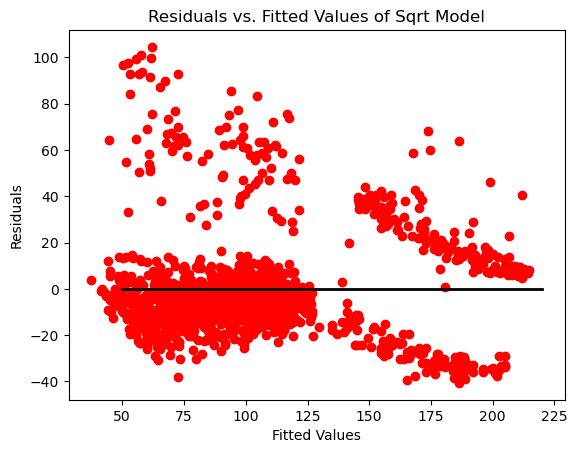

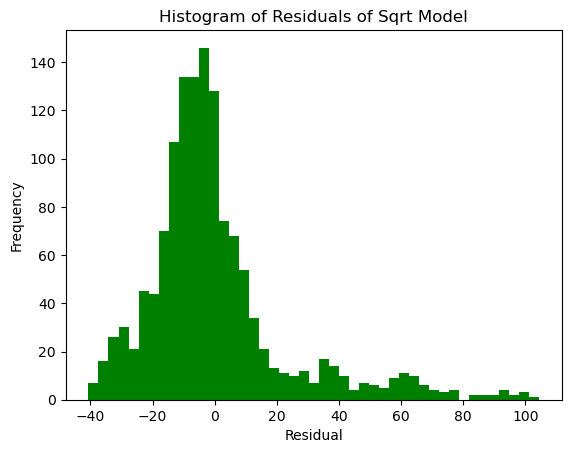

In [24]:
X = healthcare_df[["age", "bmi", "smoker_yes"]]
y = healthcare_df["charges"]

model = LinearRegression().fit(np.sqrt(X), np.sqrt(y))

fitted_values = model.predict(np.sqrt(X))  
residuals = np.sqrt(y) - fitted_values

plt.scatter(x = fitted_values, y = residuals, c = "red")
plt.plot([50, 220], [0,0], color = "black", lw = 2);
plt.title("Residuals vs. Fitted Values of Sqrt Model")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

plt.figure()
plt.hist(residuals, color="green", bins="auto")
plt.title("Histogram of Residuals of Sqrt Model")
plt.ylabel("Frequency")
plt.xlabel("Residual")
plt.show()